![portada](../Data/Portada2.jpg)


1. [Introducción](#1.-Introduccion)
2. [Hipótesis](#2.-Hipotesis)
3. [Metodología](#3.-Metodologia)
4. [Descripción de las variables](#4.-Descripcion-de-las-variables)
5. [Análisis](#5.-Analisis)
6. [Conclusiones](#6.-Conclusiones)

## 1. Introduccion

En el mundo actual, el análisis de datos desempeña un papel fundamental en la toma de decisiones empresariales. Los analistas de datos son profesionales altamente demandados que utilizan sus habilidades técnicas y conocimientos para extraer información valiosa a partir de conjuntos de datos. Sin embargo, comprender la relación entre los distintos puestos de analista de datos y los salarios asociados puede ser clave tanto para los empleadores como para los profesionales en busca de oportunidades laborales.

En este Análisis Exploratorio de Datos (EDA), exploraremos los salarios de los analistas de datos en función del nivel de experiencia y el puesto específico. Investigaremos cómo los salarios varían entre diferentes niveles de experiencia, desde analistas de datos junior hasta analistas de datos senior, y también analizaremos las diferencias salariales entre distintos puestos, como analista de datos de negocios, analista de datos de marketing, analista de datos financieros, entre otros.

Al realizar este EDA, esperamos descubrir patrones, tendencias y relaciones que nos permitan comprender mejor la estructura salarial dentro del campo de los analistas de datos. Estos hallazgos podrían proporcionar información valiosa tanto para los empleadores, que podrían ajustar sus políticas salariales para atraer y retener talento, como para los profesionales en busca de oportunidades laborales, que podrían utilizar esta información para tomar decisiones informadas sobre su carrera.

A través de visualizaciones, análisis estadísticos y exploración de datos, buscaremos revelar conocimientos clave sobre los salarios de los analistas de datos según el nivel de experiencia y el puesto. Este análisis puede servir como punto de partida para un análisis más profundo y ayudar a orientar las decisiones relacionadas con la compensación salarial en el campo de los analistas de datos.



## 2. Hipotesis

Nuestra principal hipotesis son existencia de correlación entre los años de experiencia y el salario. Pero en este EDA queremos indagar mas profundamente. Buscamos encontrar la relación entre el salario y tamaño de la empresa, asi como el país de procedencia de la empresa. 

Valoramos también el tipo de contrato y las consecuencias que tiene en la retribución salarial.

## 3. Metodologia

En este estudio, se realizará un análisis exploratorio de datos (EDA) para investigar los salarios en el campo de data science. El objetivo es comprender las relaciones y patrones que existen entre los salarios y las variables seleccionadas: 'work_year', 'experience_level', 'employment_type', 'job_title', 'employee_residence', 'remote_ratio', 'company_location' y 'company_size'.

Llevaremos a cabo un análisis descriptivo de las variables para comprender su distribución y características estadísticas relevantes. Buscaremos las relaciones entre las variables seleccionadas y los niveles salariales de los profesionales de data science mediante técnicas de visualización y análisis estadístico para investigar posibles correlaciones o asociaciones. 

## 4. Descripcion de las variables.


1. **work_year**: El año en que se pagó el salario.

2. **experience_level** : El nivel de experiencia en el trabajo durante el año. 

    - EN se refiere a nivel de entrada/junior.
    - MI se refiere a nivel intermedio.
    - SE se refiere a nivel senior/experto.
    - EX se refiere a nivel ejecutivo/director.

    Esta variable categorica ha sido sustituida por la media de salarios de cada nivel de experiencia.

3. **employment_type**: Tipo de contrato del sujeto. En el dataframe original podemos observar la distinción entre:
    - PT se refiere a medio tiempo.
    - FT se refiere a tiempo completo.
    - CT se refiere a contrato.
    - FL se refiere a trabajo independiente.

4. **job_title**: El puesto en el que se trabajó durante el año.

5. **salary**: El monto total del salario bruto pagado.

6. **salary_currency**: La moneda del salario pagado, en formato de código de moneda ISO 4217.

7. **salaryinusd**: El salario en USD.

8. **employee_residence**: El país de residencia principal del empleado durante el año de trabajo.

9. **remote_ratio**: La cantidad general de trabajo realizado de forma remota.

10. **company_location**: El país de la oficina principal del empleador o sucursal contratante.

11.  **company_size**: El número medio de personas que trabajaron para la empresa durante el año.


## 5. Analisis.


Comenzaremos el análisis observando la influencia de las distintas variables sobre el salario. Para ello emplearemos el csv raw, ya que es el que contiene las variables categoricas.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Data/raw/ds_salaries.csv")
df.max()

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        VN
company_size                             S
dtype: object

El trabajo mejor pagado en 2023 ha sido para el puesto de Data Scientist, con un salario anual de 450.000 USD. Se trata de un trabajador senior, y sorprendentemente, que trabaja a tiempo parcial. Esto nos puede indicar que la experencia del trabajador influye mas sobre su sueldo, que el tipo de contrato. 

In [4]:
df.remote_ratio.value_counts(normalize=True) * 100

0      51.211718
100    43.754993
50      5.033289
Name: remote_ratio, dtype: float64

De los datos recogidos, 43% trabajan 100% en remoto mientras que el 51% trabajan de forma presencial. Tan solo un 5% del total alternan trabajo remoto con presencial.

### Cod.1

In [16]:
job_titles_salari = df.groupby("job_title")["salary_in_usd"].mean()
job_titles_salari = job_titles_salari.sort_values(ascending=False)
mask = job_titles_salari[['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect',
       'Research Scientist', 'Data Science Manager', 'Applied Scientist',
       'Research Engineer']]

### cod.2
En el siguiente gráfico, podemos observar los 10 puestos de trabajo más populares en datascience, según los datos que hemos recolectado.



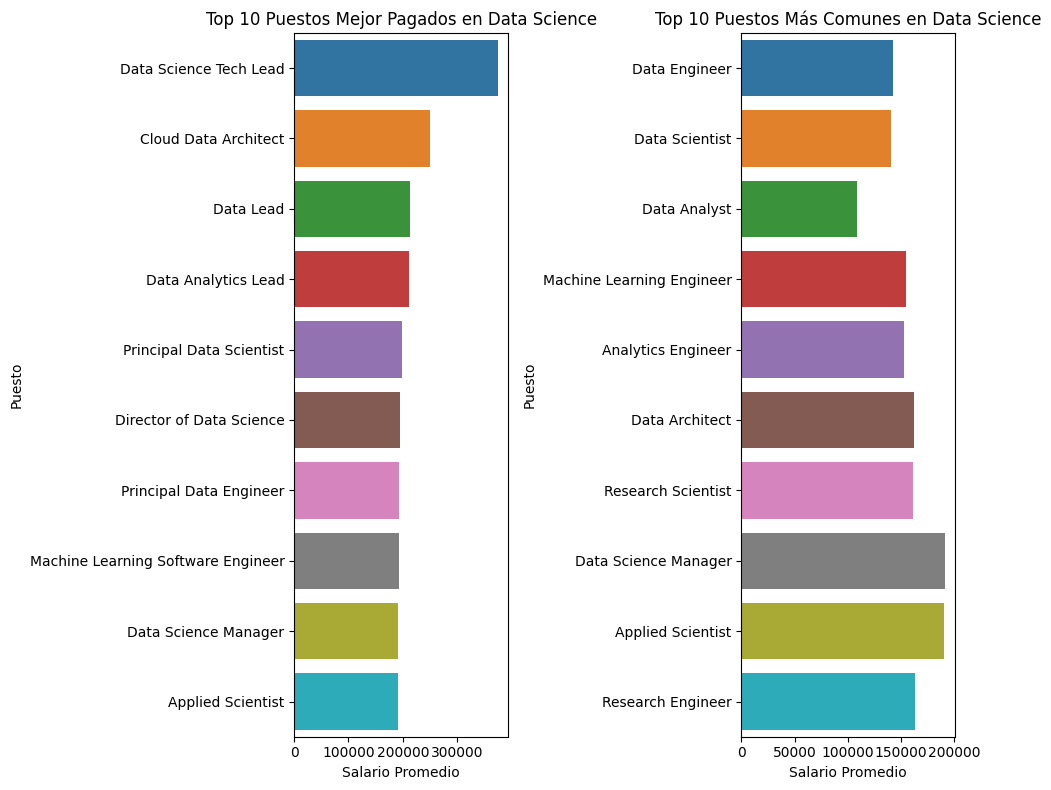

In [17]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
# Primer gráfico
plt.subplot(1, 2, 1)
sns.barplot(y=job_titles_salari.head(10).index, x=job_titles_salari.head(10).values)
plt.title('Top 10 Puestos Mejor Pagados en Data Science')
plt.xlabel('Salario Promedio')
plt.ylabel('Puesto')

# Segundo gráfico
plt.subplot(1, 2, 2)
sns.barplot(y=mask.index, x=mask.values)
plt.title('Top 10 Puestos Más Comunes en Data Science')
plt.xlabel('Salario Promedio')
plt.ylabel('Puesto')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

En cambio, los 10 puestos mejor pagados, no forman parte de los mas comunes. De estos datos, se puede concluir que los puestos de mayor remuneración están asociados a roles de liderazgo y experiencia avanzada en el campo de la ciencia de datos, como Data Science Tech Lead, Principal Data Scientist y Director of Data Science. También se observa que los puestos relacionados con arquitectura de datos y análisis, como Cloud Data Architect y Data Analytics Lead, también están entre los mejor pagados.

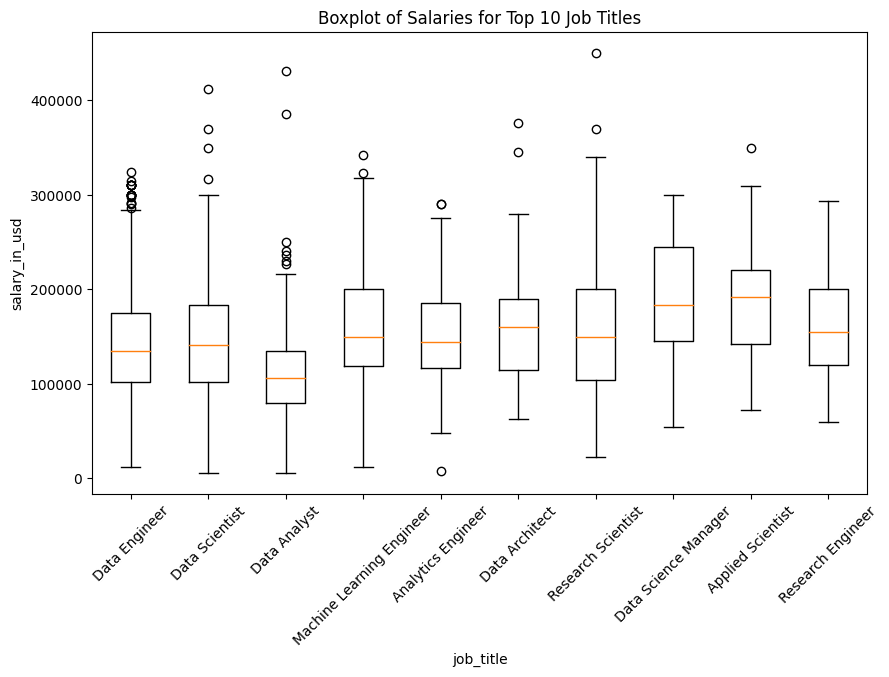

In [7]:
top_x = df["job_title"].value_counts().nlargest(10).index
top_x_data = df[df["job_title"].isin(top_x)]
    
plt.figure(figsize=(10, 6))
plt.boxplot([top_x_data[top_x_data["job_title"] == title]["salary_in_usd"] for title in top_x],
                labels=top_x)
plt.xlabel("job_title")
plt.ylabel("salary_in_usd")
plt.title(f"Boxplot of Salaries for Top 10 Job Titles")
plt.xticks(rotation=45)
plt.show()
  

Este boxplot representa los salarios para los 10 top job titles. En general no existe mucha direferencia en el salario medio de cada puesto, pero si es interesante el hecho de que Data Analyst tiene el salario mas bajo de entre todos ellos.

Si prestamos atención a la experiencia podemos observar como un 67% de nuestros datos se corresponden con el nivel senior, en cambio el menor común es el de executive. Esto se debe a lo mencionado anteriormente, a roles de liderazgo y experiencia avanzada en el campo de la ciencia de datos.

In [8]:
df["experience_level"].value_counts(normalize=True)*100

SE    67.003995
MI    21.438083
EN     8.521971
EX     3.035952
Name: experience_level, dtype: float64

In [21]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [22]:
plt.figure(figsize=[12,4])
sns.barplot(y=job_titles_salari.head(10).index, x=job_titles_salari.head(10).values, hue=df["experience_level"])
plt.title('Countplot for experience_level Variable')
plt.show()

ValueError: Grouper and axis must be same length

<Figure size 1200x400 with 0 Axes>

Podemos analizar también la relación entre los sueldos y el nivel de experiencia. Que las empresas medianas paguen más que las grandes y que las pequeñas son las que menos pagan puede tener varias explicaciones posibles.

1. Estructura organizativa: Las empresas medianas suelen tener una estructura más plana en comparación con las grandes empresas, lo que significa que hay menos niveles jerárquicos. Esto podría permitir una distribución más equitativa de los salarios, lo que resulta en salarios más altos para los empleados con experiencia. Por otro lado, las grandes empresas pueden tener una estructura más jerárquica con niveles de gestión intermedios, lo que puede diluir los salarios más altos.

2. Flexibilidad y adaptabilidad: Las empresas medianas a menudo tienen una mayor capacidad para adaptarse rápidamente a las condiciones cambiantes del mercado y las demandas de los empleados. Pueden ofrecer salarios más competitivos para atraer y retener talento, especialmente para empleados con experiencia. Las grandes empresas, debido a su tamaño y procesos más rígidos, pueden tener una menor capacidad para ajustar rápidamente los salarios, lo que puede resultar en salarios relativamente más bajos en comparación con las empresas medianas.

3. Recursos financieros: Aunque las grandes empresas generalmente tienen mayores recursos financieros en términos absolutos, también pueden enfrentar mayores costos operativos y estructurales. Esto podría influir en su capacidad para destinar una proporción más alta de sus ingresos a los salarios. Por otro lado, las empresas medianas pueden tener una mejor relación entre costos y recursos financieros, lo que les permite asignar una mayor proporción de sus ingresos a los salarios de los empleados.

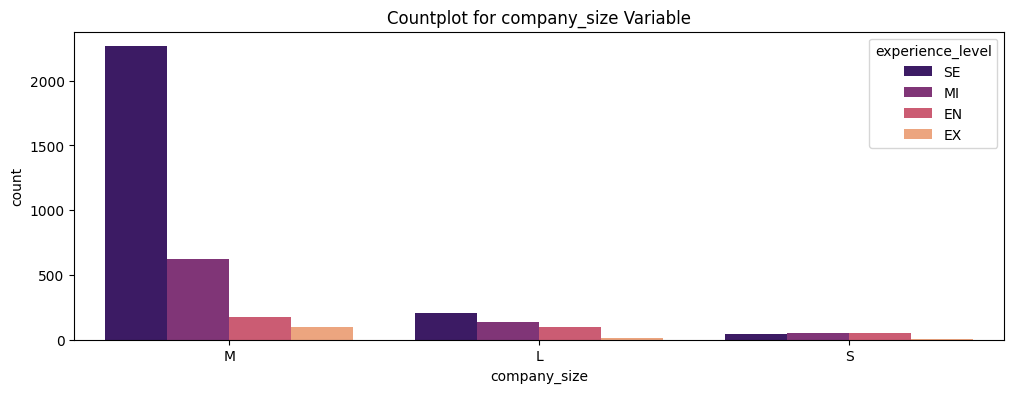

In [ ]:
plt.figure(figsize=[12,4])
sns.countplot(x = df['company_size'],hue=df['experience_level'],order=df['company_size'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

Pasemos a observar, con el df processed, las correlaciones entre las distintas variables.

## 6. Conclusiones.

Con los datos vistos hasta el momento, y reiterandonos en el siguiente gráfico, podemos observar las variables que más influyen en el salario.

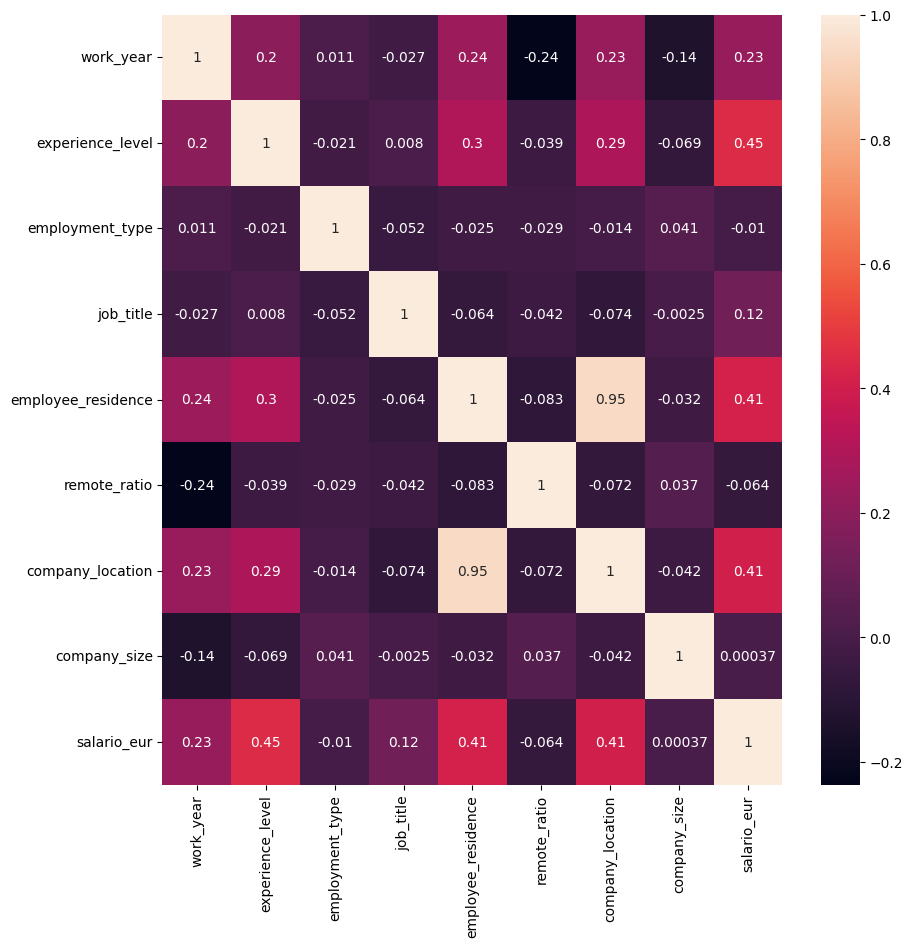

In [56]:
df_processed = pd.read_csv("../data/processed.csv")
plt.figure(figsize = (10,10))
sns.heatmap(df_processed.corr(), annot=True);

En conclusión, analizando las correlaciones entre las variables y el salario en este conjunto de datos, se puede observar que hay algunas variables que parecen tener una influencia más fuerte en la determinación del salario. Estas variables son la ubicación de la empresa, la ubicación del trabajador y el nivel de experiencia.

La ubicación de la empresa y del trabajador muestran una correlación positiva moderada con el salario. Esto implica que tanto las empresas ubicadas en regiones prósperas como los trabajadores que residen en áreas de mayor costo de vida tienden a tener salarios más altos. Esto puede estar relacionado con la disponibilidad de oportunidades laborales y el nivel general de desarrollo económico de esas regiones.

Además, el nivel de experiencia también muestra una correlación positiva moderada con el salario. Esto sugiere que a medida que los empleados adquieren más experiencia en un campo determinado, es probable que sus salarios aumenten. Esto puede reflejar la valoración de las habilidades y el conocimiento especializado que se obtiene con la experiencia laboral.

Es importante tener en cuenta que estos resultados se basan en las correlaciones y no establecen una relación causal directa entre las variables y el salario. Otros factores, como la industria, la demanda del mercado laboral y las políticas salariales de las empresas, también pueden influir en la determinación del salario.

En resumen, la localización tanto de la empresa como del trabajador, así como el nivel de experiencia, parecen ser factores importantes que influyen en la determinación del salario. Estos hallazgos pueden ser útiles para comprender mejor las tendencias salariales en tu conjunto de datos y pueden servir como puntos de referencia para futuros análisis y toma de decisiones relacionadas con la compensación salarial.